In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations':
  os.chdir(r'/home/hasan/Schreibtisch/projects/git_data/quarto_blog_hasan/posts/series/cv-foundations')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708118050.9241908, "/home/hasan/miniconda3/lib/python3.12/zipimport.py": 1708118050.3201988, "/home/hasan/miniconda3/lib/python3.12/codecs.py": 1708118050.0762022, "/home/hasan/miniconda3/lib/python3.12/encodings/aliases.py": 1708118050.5121963, "/home/hasan/miniconda3/lib/python3.12/encodings/__init__.py": 1708118050.6041949, "/home/hasan/miniconda3/lib/python3.12/encodings/utf_8.py": 1708118050.7081935, "/home/hasan/miniconda3/lib/python3.12/abc.py": 1708118050.0562024, "/home/hasan/miniconda3/lib/python3.12/io.py": 1708118050.1442013, "/home/hasan/miniconda3/lib/python3.12/stat.py": 1708118050.2561998, "/home/hasan/miniconda3/lib/python3.12/_collections_abc.py": 1708118050.084202, "/home/hasan/miniconda3/lib/python3.12/genericpath.py": 1708118050.1242015, "/home/hasan/miniconda3/lib/python3.12/posixpath.py": 1708118050.19220

Image shape: (627, 1200, 3)
Image size: 2257200 total pixels


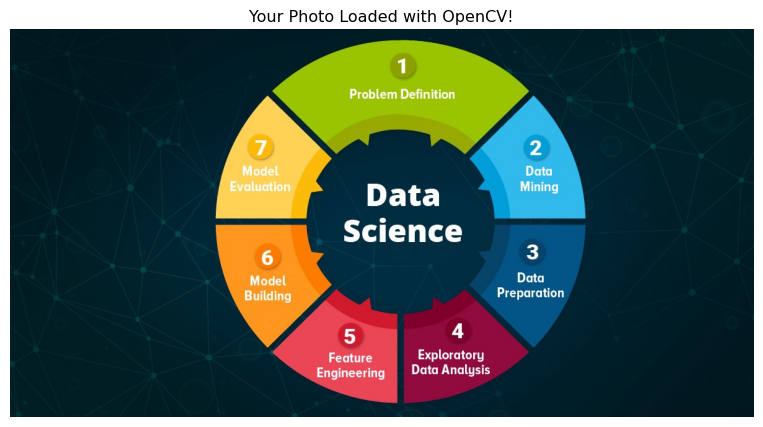

In [2]:
#| eval: true
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load an image (OpenCV reads in BGR format by default)
img = cv2.imread('images/image.jpg')

# Convert BGR to RGB (for matplotlib display)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(f"Image shape: {img_rgb.shape}")
print(f"Image size: {img_rgb.size} total pixels")

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(img_rgb)
plt.title("Your Photo Loaded with OpenCV!")
plt.axis('off')
plt.show()

Original size: 1200 x 627


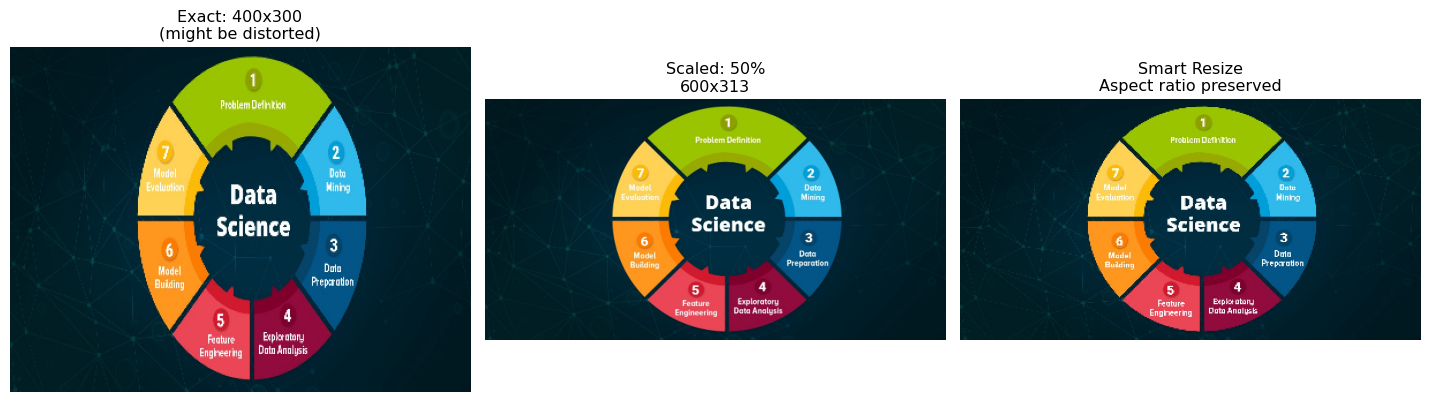

In [3]:
#| eval: true
# Original image
height, width = img_rgb.shape[:2]
print(f"Original size: {width} x {height}")

# Method 1: Specify exact dimensions
resized_exact = cv2.resize(img_rgb, (400, 300))

# Method 2: Scale by percentage
scale_percent = 50  # 50% of original size
new_width = int(width * scale_percent / 100)
new_height = int(height * scale_percent / 100)
resized_scaled = cv2.resize(img_rgb, (new_width, new_height))

# Method 3: Keep aspect ratio (the smart way!)
def resize_with_aspect_ratio(image, width=None, height=None):
    h, w = image.shape[:2]
    
    if width is None and height is None:
        return image
    
    if width is None:
        # Calculate width based on height
        ratio = height / h
        width = int(w * ratio)
    else:
        # Calculate height based on width
        ratio = width / w
        height = int(h * ratio)
    
    return cv2.resize(image, (width, height))

resized_smart = resize_with_aspect_ratio(img_rgb, width=400)

# Show the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(resized_exact)
plt.title(f"Exact: 400x300\n(might be distorted)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(resized_scaled)
plt.title(f"Scaled: 50%\n{new_width}x{new_height}")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(resized_smart)
plt.title(f"Smart Resize\nAspect ratio preserved")
plt.axis('off')

plt.tight_layout()
plt.show()

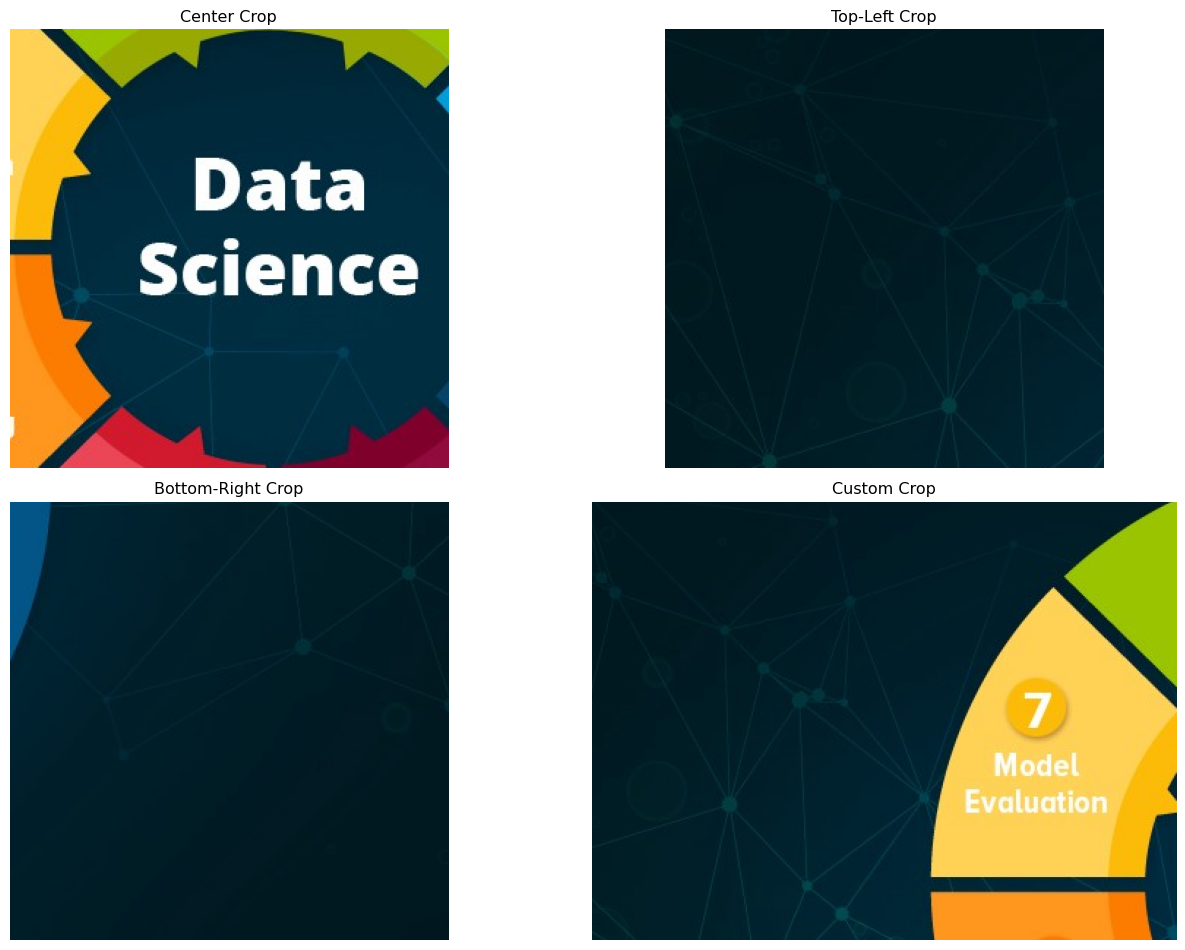

In [4]:
#| eval: true
# Cropping is just array slicing!
height, width = img_rgb.shape[:2]

# Center crop (most common)
crop_size = 300
start_x = (width - crop_size) // 2
start_y = (height - crop_size) // 2
center_crop = img_rgb[start_y:start_y+crop_size, start_x:start_x+crop_size]

# Top-left crop
top_left_crop = img_rgb[0:300, 0:300]

# Bottom-right crop
bottom_right_crop = img_rgb[height-300:height, width-300:width]

# Custom crop function
def smart_crop(image, x, y, width, height):
    """Crop with bounds checking"""
    h, w = image.shape[:2]
    
    # Make sure we don't go out of bounds
    x = max(0, min(x, w - width))
    y = max(0, min(y, h - height))
    width = min(width, w - x)
    height = min(height, h - y)
    
    return image[y:y+height, x:x+width]

custom_crop = smart_crop(img_rgb, 100, 50, 400, 300)

# Display results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(center_crop)
plt.title("Center Crop")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(top_left_crop)
plt.title("Top-Left Crop")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(bottom_right_crop)
plt.title("Bottom-Right Crop")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(custom_crop)
plt.title("Custom Crop")
plt.axis('off')

plt.tight_layout()
plt.show()

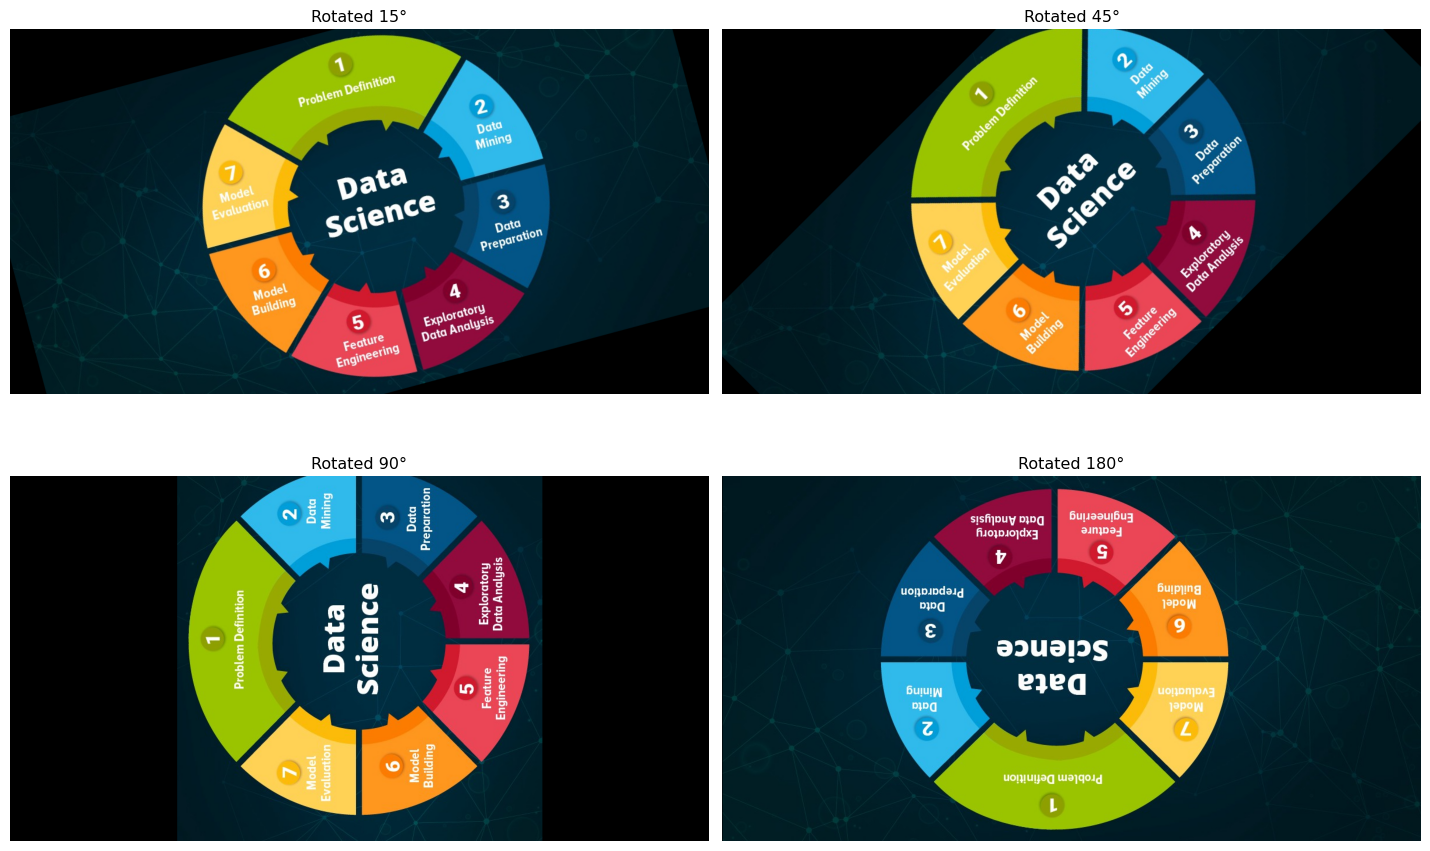

In [5]:
#| eval: true
def rotate_image(image, angle):
    """Rotate image by angle (in degrees)"""
    height, width = image.shape[:2]
    
    # Get rotation matrix
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Apply rotation
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated

def rotate_and_crop(image, angle):
    """Rotate and crop to remove black borders"""
    height, width = image.shape[:2]
    center = (width // 2, height // 2)
    
    # Calculate new dimensions to avoid black borders
    angle_rad = np.radians(abs(angle))
    new_width = int(width * np.cos(angle_rad) + height * np.sin(angle_rad))
    new_height = int(height * np.cos(angle_rad) + width * np.sin(angle_rad))
    
    # Get rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    
    # Adjust translation
    rotation_matrix[0, 2] += (new_width - width) / 2
    rotation_matrix[1, 2] += (new_height - height) / 2
    
    # Apply rotation
    rotated = cv2.warpAffine(image, rotation_matrix, (new_width, new_height))
    return rotated

# Try different rotations
angles = [15, 45, 90, 180]
plt.figure(figsize=(15, 10))

for i, angle in enumerate(angles):
    rotated = rotate_image(img_rgb, angle)
    
    plt.subplot(2, 2, i+1)
    plt.imshow(rotated)
    plt.title(f"Rotated {angle}°")
    plt.axis('off')

plt.tight_layout()
plt.show()

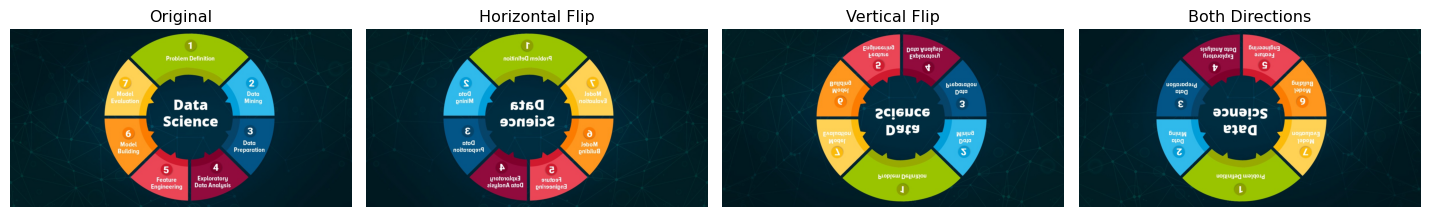

In [6]:
#| eval: true
# Horizontal flip (left-right mirror)
flipped_horizontal = cv2.flip(img_rgb, 1)

# Vertical flip (upside down)
flipped_vertical = cv2.flip(img_rgb, 0)

# Both directions (180° rotation equivalent)
flipped_both = cv2.flip(img_rgb, -1)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(flipped_horizontal)
plt.title("Horizontal Flip")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(flipped_vertical)
plt.title("Vertical Flip")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(flipped_both)
plt.title("Both Directions")
plt.axis('off')

plt.tight_layout()
plt.show()

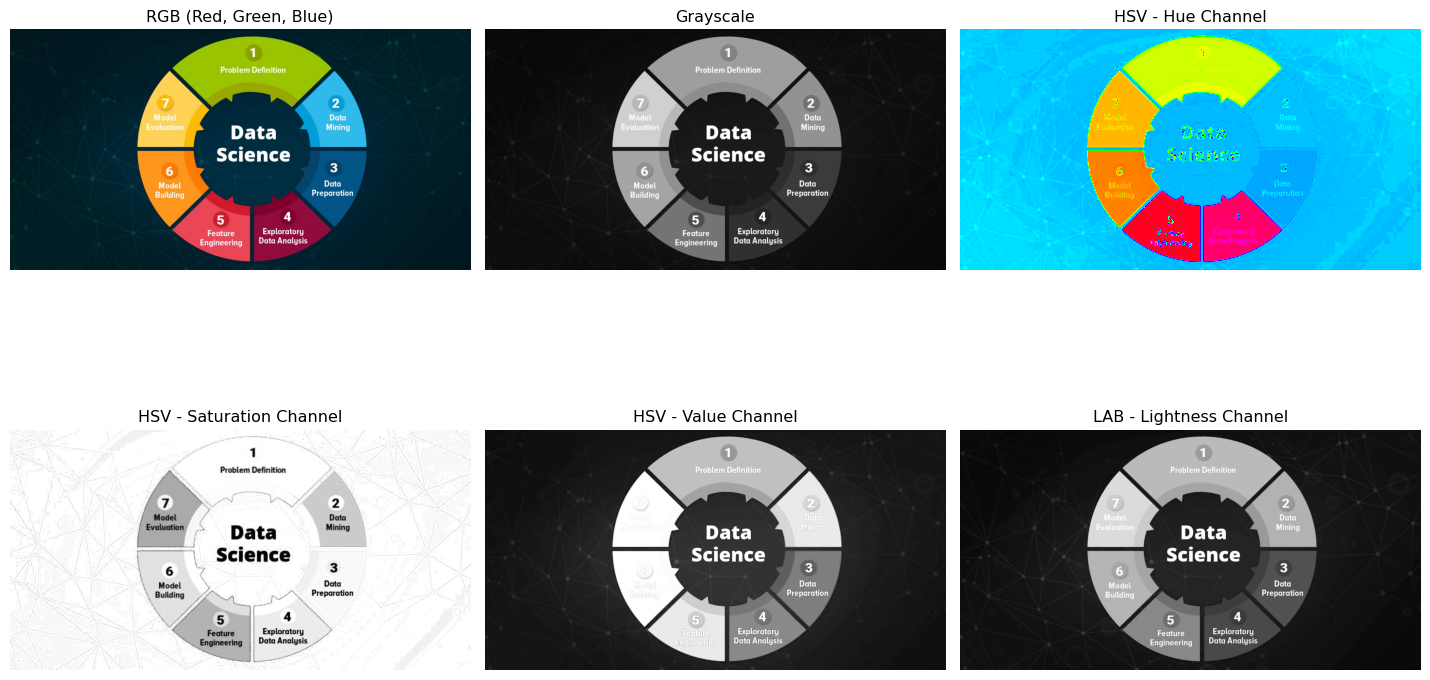

Color space info:
RGB shape: (627, 1200, 3)
Grayscale shape: (627, 1200)
HSV shape: (627, 1200, 3)


In [7]:
#| eval: true
# Convert to different color spaces
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)

plt.figure(figsize=(15, 10))

# Original RGB
plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title("RGB (Red, Green, Blue)")
plt.axis('off')

# Grayscale
plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis('off')

# HSV channels
plt.subplot(2, 3, 3)
plt.imshow(hsv[:, :, 0], cmap='hsv')  # Hue
plt.title("HSV - Hue Channel")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(hsv[:, :, 1], cmap='gray')  # Saturation
plt.title("HSV - Saturation Channel")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(hsv[:, :, 2], cmap='gray')  # Value
plt.title("HSV - Value Channel")
plt.axis('off')

# LAB
plt.subplot(2, 3, 6)
plt.imshow(lab[:, :, 0], cmap='gray')
plt.title("LAB - Lightness Channel")
plt.axis('off')

plt.tight_layout()
plt.show()

print("Color space info:")
print(f"RGB shape: {img_rgb.shape}")
print(f"Grayscale shape: {gray.shape}")
print(f"HSV shape: {hsv.shape}")

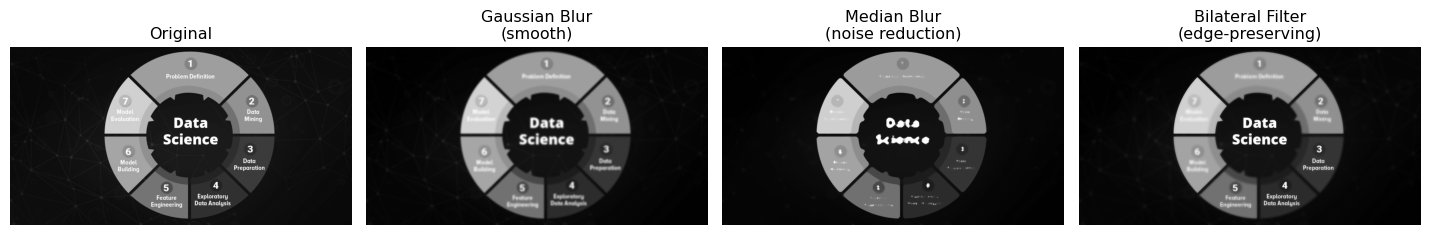

In [8]:
#| eval: true
# Convert to grayscale for cleaner examples
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Different types of blur
gaussian_blur = cv2.GaussianBlur(gray_img, (15, 15), 0)
median_blur = cv2.medianBlur(gray_img, 15)
bilateral_blur = cv2.bilateralFilter(gray_img, 15, 80, 80)

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(gaussian_blur, cmap='gray')
plt.title("Gaussian Blur\n(smooth)")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(median_blur, cmap='gray')
plt.title("Median Blur\n(noise reduction)")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(bilateral_blur, cmap='gray')
plt.title("Bilateral Filter\n(edge-preserving)")
plt.axis('off')

plt.tight_layout()
plt.show()

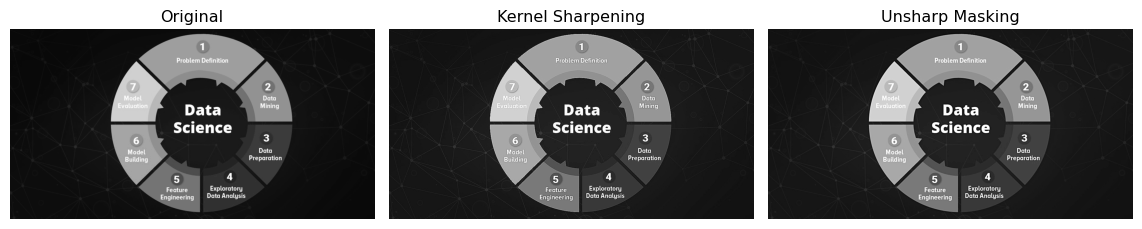

In [9]:
#| eval: true
# Create a sharpening kernel
sharpening_kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Apply the kernel
sharpened = cv2.filter2D(gray_img, -1, sharpening_kernel)

# Alternative: Unsharp masking (more sophisticated)
blurred = cv2.GaussianBlur(gray_img, (0, 0), 2.0)
unsharp_mask = cv2.addWeighted(gray_img, 1.5, blurred, -0.5, 0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened, cmap='gray')
plt.title("Kernel Sharpening")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(unsharp_mask, cmap='gray')
plt.title("Unsharp Masking")
plt.axis('off')

plt.tight_layout()
plt.show()

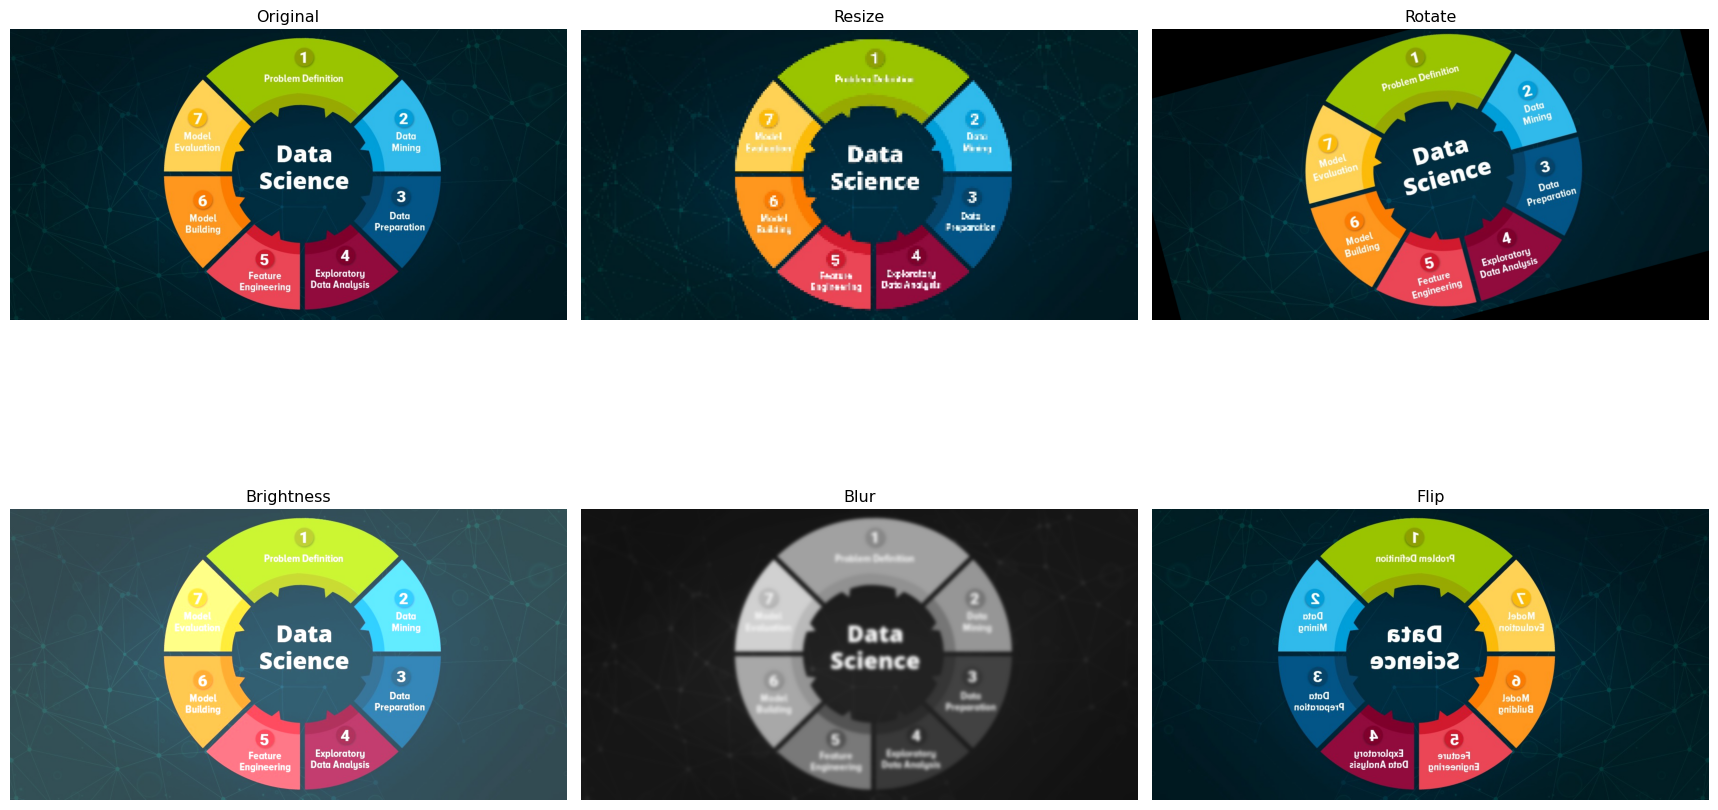

In [10]:
#| eval: true
def photo_editor(image, operation='original', **kwargs):
    """A simple photo editor with multiple operations"""
    
    if operation == 'resize':
        width = kwargs.get('width', 400)
        return resize_with_aspect_ratio(image, width=width)
    
    elif operation == 'crop':
        x, y, w, h = kwargs.get('crop_box', (100, 100, 300, 300))
        return smart_crop(image, x, y, w, h)
    
    elif operation == 'rotate':
        angle = kwargs.get('angle', 45)
        return rotate_image(image, angle)
    
    elif operation == 'flip':
        direction = kwargs.get('direction', 'horizontal')
        if direction == 'horizontal':
            return cv2.flip(image, 1)
        elif direction == 'vertical':
            return cv2.flip(image, 0)
        else:
            return cv2.flip(image, -1)
    
    elif operation == 'blur':
        kernel_size = kwargs.get('kernel_size', 15)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        blurred = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
        return cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)
    
    elif operation == 'brightness':
        value = kwargs.get('value', 50)
        return np.clip(image.astype(np.int16) + value, 0, 255).astype(np.uint8)
    
    else:
        return image

# Demo the photo editor
operations = [
    ('original', {}),
    ('resize', {'width': 300}),
    ('rotate', {'angle': 15}),
    ('brightness', {'value': 50}),
    ('blur', {'kernel_size': 21}),
    ('flip', {'direction': 'horizontal'})
]

plt.figure(figsize=(18, 12))

for i, (op, params) in enumerate(operations):
    result = photo_editor(img_rgb, op, **params)
    
    plt.subplot(2, 3, i+1)
    if len(result.shape) == 2:  # Grayscale
        plt.imshow(result, cmap='gray')
    else:
        plt.imshow(result)
    plt.title(f"{op.title()}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
#| eval: true
def process_photo_batch(image_path):
    """Process a photo for social media"""
    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Resize for Instagram (square format)
    img_resized = resize_with_aspect_ratio(img_rgb, width=1080)
    
    # Center crop to square
    h, w = img_resized.shape[:2]
    size = min(h, w)
    start_x = (w - size) // 2
    start_y = (h - size) // 2
    img_square = img_resized[start_y:start_y+size, start_x:start_x+size]
    
    # Apply slight blur for dreamy effect
    img_final = cv2.GaussianBlur(img_square, (3, 3), 0)
    
    return img_final

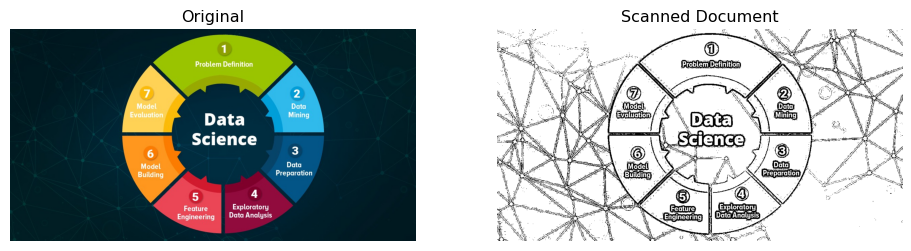

In [12]:
#| eval: true
def scan_document(image):
    """Simple document scanner"""
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply adaptive thresholding (makes text crisp)
    binary = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
        cv2.THRESH_BINARY, 11, 2
    )
    
    return binary

# Try it on your image (if it has text)
scanned = scan_document(img_rgb)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(scanned, cmap='gray')
plt.title("Scanned Document")
plt.axis('off')
plt.show()

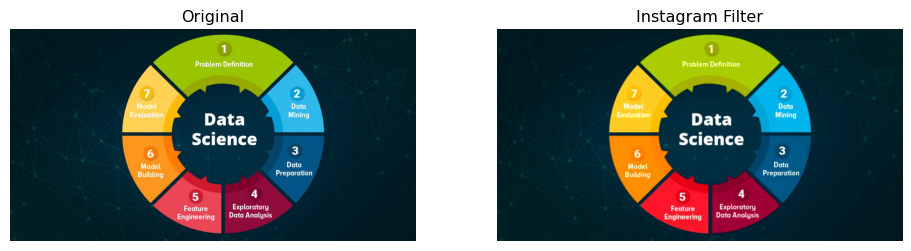

In [13]:
#| eval: true
def instagram_filter(image):
    """Create an Instagram-style vintage filter"""
    # Step 1: Slight blur for dreamy effect
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    
    # Step 2: Increase saturation (convert to HSV)
    hsv = cv2.cvtColor(blurred, cv2.COLOR_RGB2HSV)
    hsv[:, :, 1] = np.clip(hsv[:, :, 1] * 1.3, 0, 255)  # Boost saturation
    enhanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
    # Step 3: Warm color temperature (add yellow tint)
    warm = enhanced.copy().astype(np.float32)
    warm[:, :, 0] = np.clip(warm[:, :, 0] * 1.1, 0, 255)  # More red
    warm[:, :, 1] = np.clip(warm[:, :, 1] * 1.05, 0, 255)  # More green
    
    return warm.astype(np.uint8)

# Apply the filter
filtered = instagram_filter(img_rgb)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered)
plt.title("Instagram Filter")
plt.axis('off')
plt.show()

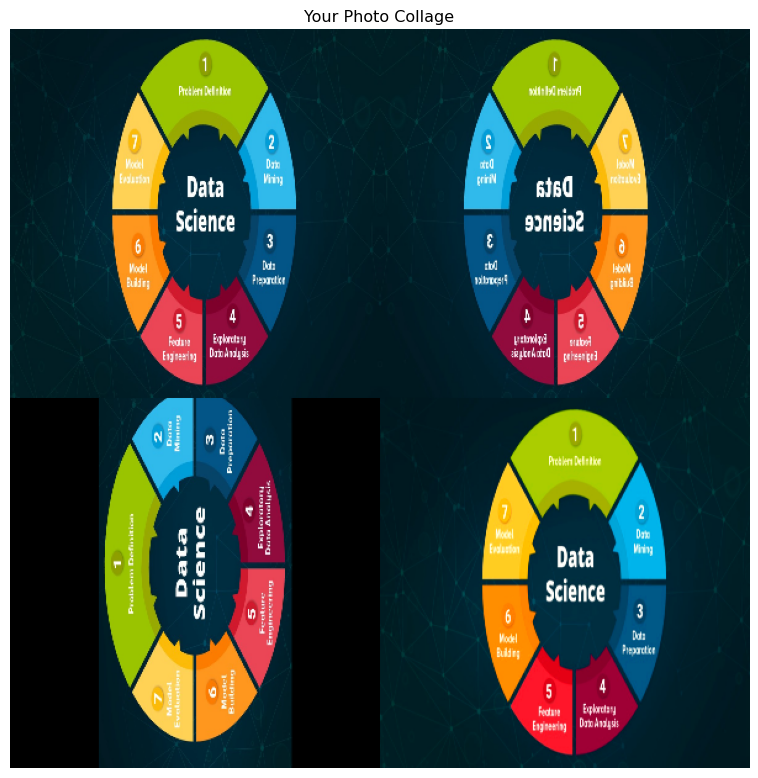

In [14]:
#| eval: true
def create_collage(images, grid_size=(2, 2)):
    """Create a photo collage"""
    rows, cols = grid_size
    
    # Resize all images to same size
    target_size = (300, 300)
    resized_images = []
    
    for img in images[:rows*cols]:  # Take only what we need
        resized = cv2.resize(img, target_size)
        resized_images.append(resized)
    
    # Create the collage
    row_images = []
    for r in range(rows):
        row_imgs = resized_images[r*cols:(r+1)*cols]
        if len(row_imgs) == cols:
            row_combined = np.hstack(row_imgs)
            row_images.append(row_combined)
    
    if len(row_images) == rows:
        collage = np.vstack(row_images)
        return collage
    
    return None

# Try it with multiple copies of your image (or different images)
images = [img_rgb, cv2.flip(img_rgb, 1), rotate_image(img_rgb, 90), filtered]
collage = create_collage(images)

if collage is not None:
    plt.figure(figsize=(10, 10))
    plt.imshow(collage)
    plt.title("Your Photo Collage")
    plt.axis('off')
    plt.show()

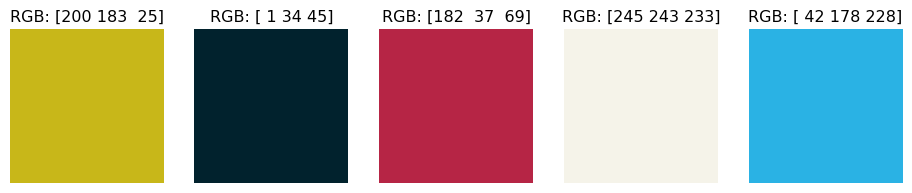

In [15]:
#| eval: true
def extract_dominant_colors(image, k=5):
    """Extract dominant colors from an image"""
    # Reshape image to be a list of pixels
    pixels = image.reshape(-1, 3)
    pixels = np.float32(pixels)
    
    # Use k-means clustering to find dominant colors
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    
    # Convert back to uint8
    centers = np.uint8(centers)
    
    return centers

# Extract colors
colors = extract_dominant_colors(img_rgb)

# Display the palette
plt.figure(figsize=(12, 3))
for i, color in enumerate(colors):
    plt.subplot(1, len(colors), i+1)
    color_patch = np.full((100, 100, 3), color, dtype=np.uint8)
    plt.imshow(color_patch)
    plt.title(f"RGB: {color}")
    plt.axis('off')
plt.show()